| **Inicio** | **atrás 10** | **Siguiente 12** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./10_Machine_Learning.ipynb)| [⏩](./12_Machine_Learning.ipynb)

# **101. K Nearest Neighbors**

**K Vecinos Más Cercanos (K Nearest Neighbors - KNN)**

**Introducción:**

K Vecinos Más Cercanos (KNN) es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. En este método, un objeto se clasifica por la mayoría de votos de sus vecinos más cercanos. Es un algoritmo simple y efectivo basado en la idea de que los puntos de datos similares tienden a estar en la misma clase o tener valores de salida similares.

**Cómo Funciona:**

1. **Entrenamiento:**
   - Almacenamos todos los puntos de datos y sus etiquetas en el conjunto de entrenamiento.

2. **Predicción (Clasificación):**
   - Para predecir la clase de un nuevo punto, encontramos los K vecinos más cercanos en el conjunto de entrenamiento.
   - La clase del nuevo punto se determina por la mayoría de votos entre sus K vecinos más cercanos.

3. **Predicción (Regresión):**
   - Para predecir un valor numérico, tomamos el promedio de los valores de los K vecinos más cercanos.

**Parámetro Importante: K (Número de Vecinos):**
   - La elección de K afecta la suavidad de la frontera de decisión.
   - K demasiado pequeño puede hacer que el modelo sea sensible al ruido.
   - K demasiado grande puede hacer que el modelo sea demasiado suave y pierda detalles.

**Ejemplo de Clasificación en Código:**

Vamos a usar la biblioteca `scikit-learn` para implementar KNN en un ejemplo de clasificación:

Precisión del modelo KNN: 1.0


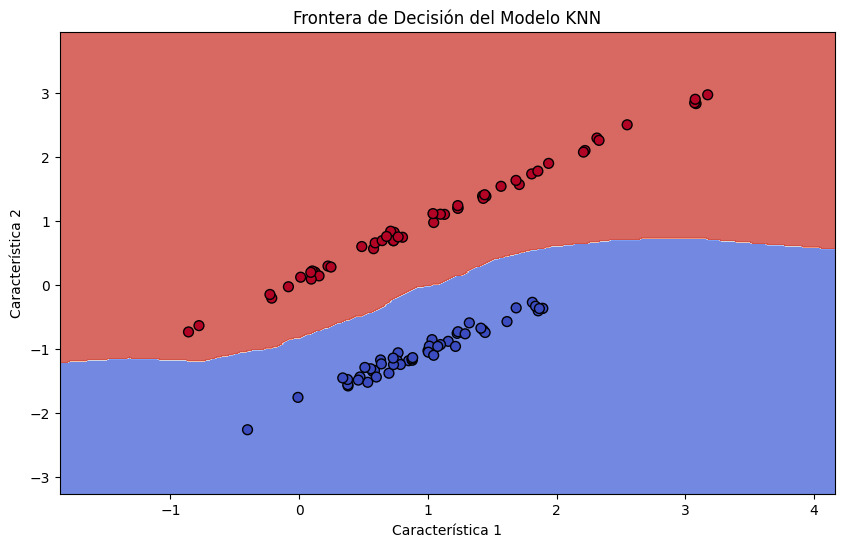

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos sintéticos para clasificación
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy}')

# Visualizar la frontera de decisión
plt.figure(figsize=(10, 6))

# Crear una malla para la visualización
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir la clase para cada punto en la malla
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar las regiones de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Visualizar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
plt.title('Frontera de Decisión del Modelo KNN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Explicación del Código:**

- Creamos datos sintéticos para clasificación utilizando `make_classification`.
- Dividimos los datos en conjuntos de entrenamiento y prueba.
- Inicializamos y entrenamos un clasificador KNN con `n_neighbors=3`.
- Realizamos predicciones en el conjunto de prueba y calculamos la precisión.
- Visualizamos la frontera de decisión del modelo en un gráfico de dispersión.

**Nota:**
El valor de `n_neighbors` se puede ajustar para cambiar la suavidad o la complejidad de la frontera de decisión. Experimentar con este parámetro puede ayudar a encontrar un equilibrio entre el sobreajuste y el subajuste.

# **102. ¿Cuáles son los supuestos de la regresión lineal?**

La regresión lineal es un método estadístico que busca modelar la relación lineal entre una variable dependiente (o respuesta) y una o más variables independientes (o predictoras). Sin embargo, la regresión lineal hace varios supuestos para que los resultados sean válidos. A continuación, se describen algunos de los supuestos más importantes:

1. **Linealidad:**
   - **Supuesto:** La relación entre las variables predictoras y la variable dependiente es lineal.
   - **Ejemplo en Código y Visualización:**

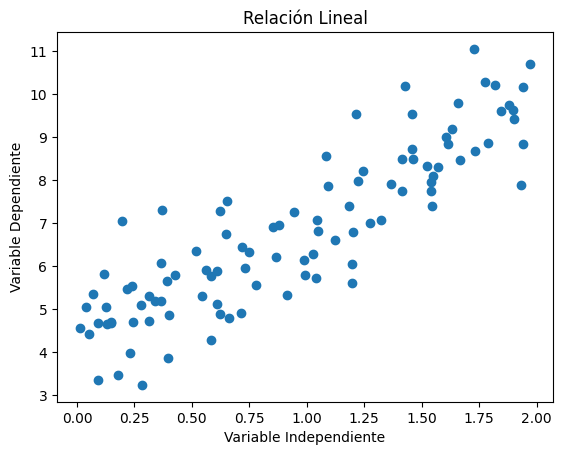

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos sintéticos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar la relación lineal
plt.scatter(X, y)
plt.title('Relación Lineal')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

En este ejemplo, la relación entre la variable independiente (`X`) y la variable dependiente (`y`) es aproximadamente lineal.

2. **Homocedasticidad:**
   - **Supuesto:** La varianza de los errores es constante en todos los niveles de las variables predictoras.
   - **Ejemplo en Código y Visualización:**

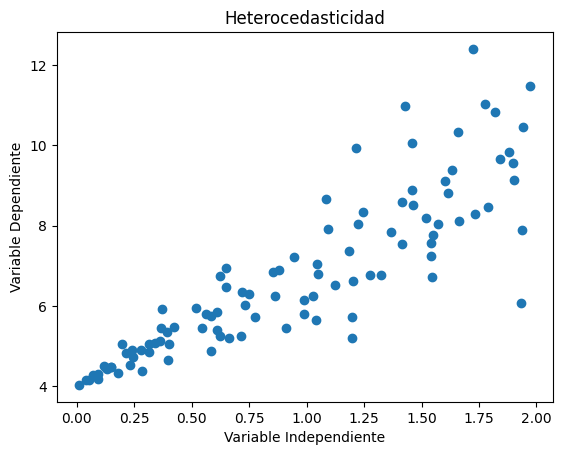

In [3]:
# Crear datos sintéticos con heterocedasticidad
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * X

# Visualizar heterocedasticidad
plt.scatter(X, y)
plt.title('Heterocedasticidad')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

En este ejemplo, la varianza de los errores aumenta con el valor de la variable independiente (`X`), lo cual es un indicador de heterocedasticidad.

3. **Normalidad de Errores:**
   - **Supuesto:** Los errores (residuos) siguen una distribución normal.
   - **Ejemplo en Código y Visualización:**

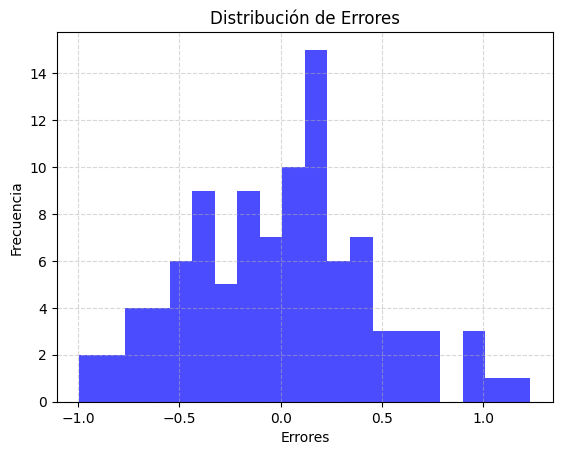

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Crear datos sintéticos con errores no normales
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.5 * np.random.randn(100, 1)

# Visualizar errores no normales
residuals = y - (4 + 3 * X)

# Personalizar la gráfica
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

En este ejemplo, la distribución de errores no sigue exactamente una distribución normal.

4. **Independencia de Errores:**
   - **Supuesto:** Los errores no están correlacionados entre sí.
   - **Ejemplo en Código y Visualización:**

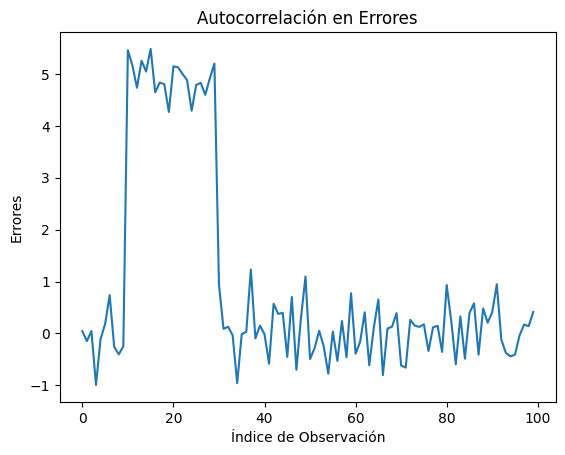

In [5]:
# Crear datos sintéticos con autocorrelación en errores
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.5 * np.random.randn(100, 1)
y[10:30] += 5  # Introducir autocorrelación en los errores

# Visualizar autocorrelación en errores
residuals = y - (4 + 3 * X)
plt.plot(residuals)
plt.title('Autocorrelación en Errores')
plt.xlabel('Índice de Observación')
plt.ylabel('Errores')
plt.show()

En este ejemplo, hay evidencia de autocorrelación en los errores, lo cual va en contra del supuesto de independencia.

5. **Sin Multicolinealidad:**
   - **Supuesto:** Las variables predictoras no están altamente correlacionadas entre sí.
   - **Ejemplo en Código y Visualización:**

In [6]:
# Crear datos sintéticos con multicolinealidad
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 2 * X1 + np.random.randn(100, 1)
y = 4 + 3 * X1 + 0.5 * X2 + np.random.randn(100, 1)

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(np.c_[X1, X2], rowvar=False)
print('Matriz de Correlación:')
print(corr_matrix)

Matriz de Correlación:
[[1.         0.75929247]
 [0.75929247 1.        ]]


En este ejemplo, las variables predictoras `X1` y `X2` están altamente correlacionadas.

Es importante tener en cuenta que estos supuestos son ideales y en la práctica pueden no cumplirse completamente. Sin embargo, comprender estos supuestos ayuda a interpretar y evaluar los resultados de un modelo de regresión lineal. En algunos casos, técnicas como la transformación de variables o el uso de métodos robustos pueden mitigar violaciones menores de los supuestos.

# **103. Máquinas de vectores de soporte | Intuición geométrica**

**Máquinas de Vectores de Soporte (Support Vector Machines - SVM)**

**Introducción:**

Las Máquinas de Vectores de Soporte (SVM) son un poderoso algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. El objetivo principal de las SVM en clasificación es encontrar un hiperplano que maximice el margen entre las clases. El margen es la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados vectores de soporte.

**Intuición Geométrica:**

1. **Hiperplano de Separación:**
   - En un problema de clasificación binaria, un hiperplano es una superficie (en un espacio de n dimensiones) que separa las dos clases.
   - La SVM busca el hiperplano que maximiza la distancia entre las dos clases, lo que se conoce como el "margen".

2. **Margen:**
   - El margen es la distancia perpendicular desde el hiperplano hasta los vectores de soporte más cercanos.
   - Los vectores de soporte son los puntos de datos más cercanos al hiperplano y son fundamentales para la definición del margen.

3. **Función de Decisión:**
   - La función de decisión asigna puntos a una clase en función de en qué lado del hiperplano se encuentren.
   - La distancia de un punto al hiperplano se utiliza para determinar la confianza de la clasificación.

4. **Problemas No Lineales:**
   - Cuando las clases no son linealmente separables, las SVM pueden utilizar "kernels" para mapear los datos a un espacio de mayor dimensión donde la separación lineal es posible.

**Ejemplo en Código y Visualización:**

Vamos a utilizar la biblioteca `scikit-learn` para implementar una SVM en un ejemplo de clasificación. En este caso, utilizaremos datos sintéticos con dos características para facilitar la visualización:

Precisión del modelo SVM: 1.0


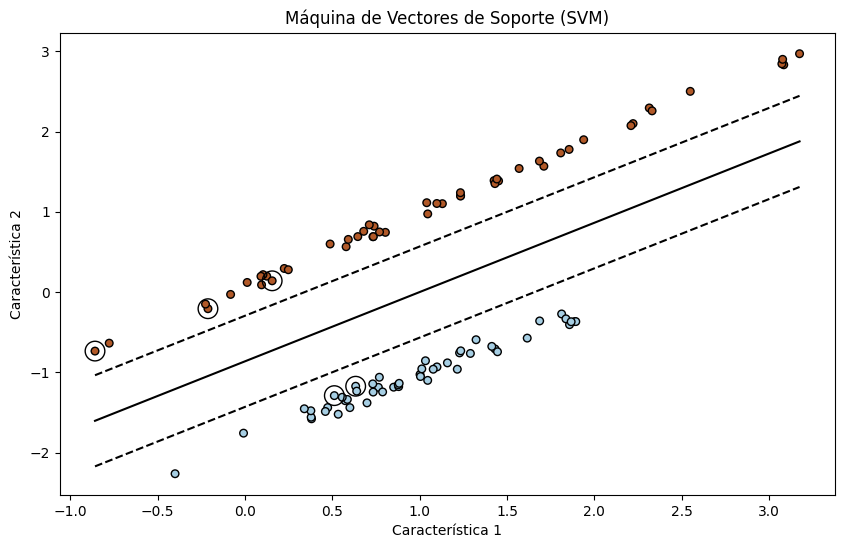

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generar datos sintéticos para clasificación
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_classifier = SVC(kernel='linear', C=1)

# Entrenar el modelo SVM
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM: {accuracy}')

# Visualizar el hiperplano y el margen
plt.figure(figsize=(10, 6))

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
plt.title('Máquina de Vectores de Soporte (SVM)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Obtener los vectores de soporte
support_vectors = svm_classifier.support_vectors_

# Dibujar el hiperplano
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

# Dibujar los márgenes
margin = 1 / np.sqrt(np.sum(svm_classifier.coef_ ** 2))
yy_upper = yy + a * margin
yy_lower = yy - a * margin
plt.plot(xx, yy_upper, 'k--')
plt.plot(xx, yy_lower, 'k--')

# Dibujar los vectores de soporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.show()

**Explicación del Código:**

- Creamos datos sintéticos con `make_classification`.
- Dividimos los datos en conjuntos de entrenamiento y prueba.
- Inicializamos y entrenamos una SVM con un kernel lineal.
- Visualizamos los datos, el hiperplano, los márgenes y los vectores de soporte.

Este ejemplo representa una SVM lineal, pero las SVM también pueden manejar problemas no lineales mediante el uso de kernels (como el kernel radial o polinómico) para mapear los datos a un espacio de mayor dimensión. La SVM busca el hiperplano óptimo que maximiza el margen y, por lo tanto, mejora la generalización del modelo.

# **104. Matemáticas de SVM | Máquinas de vectores de soporte | SVM de margen duro**

**Matemáticas de SVM con Margen Duro (Hard Margin SVM)**

Las Máquinas de Vectores de Soporte (SVM) con margen duro son un tipo de SVM que busca encontrar un hiperplano que separe dos clases en un espacio de características, maximizando el margen entre las clases y minimizando la cantidad de puntos de datos mal clasificados. En este contexto, "margen duro" significa que no se permite ningún error de clasificación en el conjunto de entrenamiento.

**Objetivo Matemático:**

El objetivo de una SVM con margen duro es encontrar el hiperplano óptimo $\mathbf{w} \cdot \mathbf{x} + b = 0$ que maximice el margen, donde:
- $(\mathbf{w})$ es el vector de pesos.
- $(\mathbf{x})$ es el vector de características de entrada.
- $(b)$ es el término de sesgo.

El margen se define como la distancia perpendicular desde el hiperplano a los puntos de entrenamiento más cercanos (vectores de soporte). Este problema puede ser formulado como un problema de optimización con las siguientes restricciones:

1. Para cada punto de datos de la clase positiva $(\mathbf{x}_i)$ con $(y_i = 1)$: $(\mathbf{w} \cdot \mathbf{x}_i + b \geq 1)$
2. Para cada punto de datos de la clase negativa $(\mathbf{x}_i)$ con $(y_i = -1)$: $(\mathbf{w} \cdot \mathbf{x}_i + b \leq -1)$

La función objetivo a maximizar es el inverso de la norma del vector de pesos $(||\mathbf{w}||)$, que está sujeto a las restricciones mencionadas anteriormente.

**Ejemplo en Código y Visualización:**

Vamos a implementar una SVM con margen duro utilizando `scikit-learn` y visualizarla con un conjunto de datos de ejemplo:

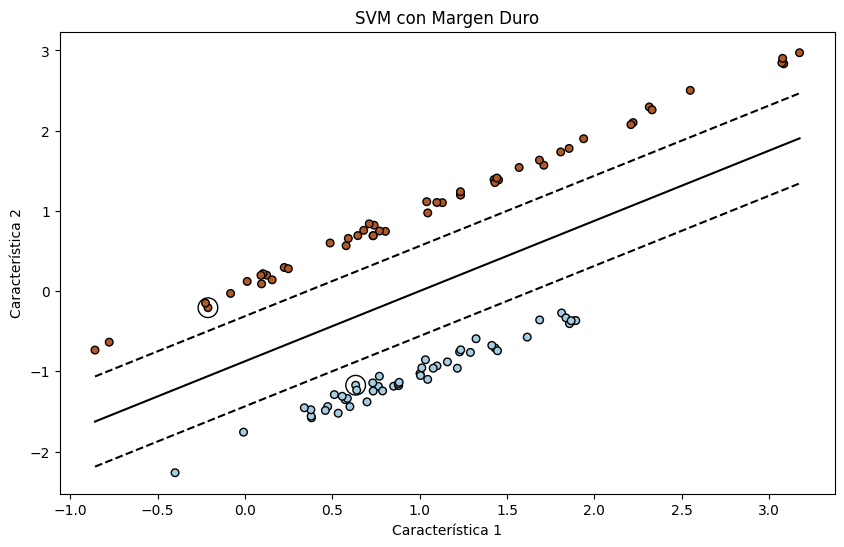

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generar datos sintéticos para clasificación
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Inicializar el clasificador SVM con margen duro
# Establecer un valor grande pero finito para 'C'
svm_classifier = SVC(kernel='linear', C=1e10)

# Entrenar el modelo SVM
svm_classifier.fit(X, y)

# Visualizar el hiperplano y el margen
plt.figure(figsize=(10, 6))

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
plt.title('SVM con Margen Duro')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Obtener los vectores de soporte
support_vectors = svm_classifier.support_vectors_

# Dibujar el hiperplano
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

# Dibujar los márgenes
margin = 1 / np.sqrt(np.sum(svm_classifier.coef_ ** 2))
yy_upper = yy + a * margin
yy_lower = yy - a * margin
plt.plot(xx, yy_upper, 'k--')
plt.plot(xx, yy_lower, 'k--')

# Dibujar los vectores de soporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.show()

En este ejemplo, la SVM utiliza un kernel lineal (`'linear'`) y se configura con un margen duro mediante el parámetro de regularización $(C=\infty)$. La visualización muestra los datos, el hiperplano y los márgenes. Los vectores de soporte están resaltados. Ten en cuenta que el conjunto de datos utilizado aquí es sintético y se proporciona solo con fines ilustrativos. En problemas del mundo real, es posible que se necesite ajustar los parámetros y considerar la posibilidad de usar un kernel no lineal para manejar datos no linealesmente separables.

# **105. Matemáticas de la máquina de vectores de soporte | SVM de margen suave**

**Matemáticas de la Máquina de Vectores de Soporte (SVM) con Margen Suave (Soft Margin SVM)**

La Máquina de Vectores de Soporte con margen suave es una extensión de la SVM con margen duro. A diferencia de la SVM con margen duro, la SVM con margen suave permite que algunos puntos de datos queden dentro del margen o incluso del lado incorrecto del hiperplano de decisión. Esta flexibilidad se logra introduciendo una variable de holgura $(\xi)$ para cada punto de datos, que mide cuánto se permite que el punto de datos viole las restricciones de margen.

**Objetivo Matemático:**

El objetivo de la SVM con margen suave es encontrar el hiperplano óptimo que maximice el margen, al mismo tiempo que minimiza las violaciones del margen. Esto se traduce en la siguiente función objetivo:

$\min_{\mathbf{w}, b, \xi} \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^{N} \xi_i$

Sujeto a las restricciones:

$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \quad \text{para } i = 1, 2, ..., N$

y

$\xi_i \geq 0 \quad \text{para } i = 1, 2, ..., N$

donde:
- $(\mathbf{w})$ es el vector de pesos.
- $(\mathbf{x}_i)$ es el vector de características del i-ésimo punto de datos.
- $(b)$ es el término de sesgo.
- $(C)$ es el parámetro de regularización que controla el equilibrio entre maximizar el margen y minimizar las violaciones del margen.
- $(\xi_i)$ son las variables de holgura asociadas con los puntos de datos.

**Ejemplo en Código y Visualización:**

Vamos a implementar una SVM con margen suave utilizando `scikit-learn` y visualizarla con un conjunto de datos de ejemplo:

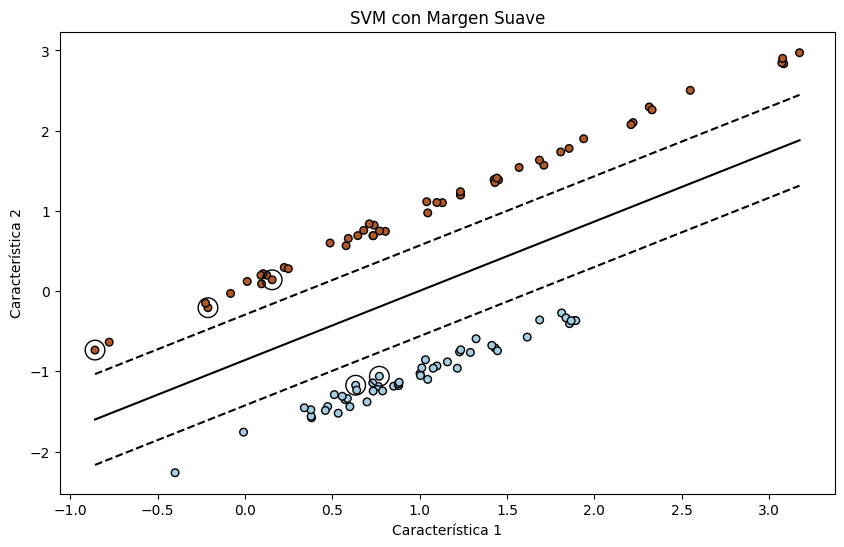

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generar datos sintéticos para clasificación
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Inicializar el clasificador SVM con margen suave
# Establecer un valor para 'C' que controla la penalización de las violaciones del margen
svm_classifier = SVC(kernel='linear', C=1)

# Entrenar el modelo SVM
svm_classifier.fit(X, y)

# Visualizar el hiperplano y el margen suave
plt.figure(figsize=(10, 6))

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
plt.title('SVM con Margen Suave')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Obtener los vectores de soporte
support_vectors = svm_classifier.support_vectors_

# Dibujar el hiperplano
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

# Dibujar los márgenes suaves
margin = 1 / np.sqrt(np.sum(svm_classifier.coef_ ** 2))
yy_upper = yy + a * margin
yy_lower = yy - a * margin
plt.plot(xx, yy_upper, 'k--')
plt.plot(xx, yy_lower, 'k--')

# Dibujar los vectores de soporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.show()

En este ejemplo, he ajustado el valor de 'C' a `1` para simbolizar una penalización moderada de las violaciones del margen. Este ajuste debería proporcionar una SVM con margen suave. Ten en cuenta que en problemas del mundo real, es posible que necesites ajustar los parámetros según la naturaleza de tus datos y el grado de flexibilidad que desees en el modelo.

# **106. Truco del kernel en SVM | Ejemplo de código**

**Truco del Kernel en SVM: Explicación y Ejemplo de Código**

El truco del kernel es una técnica clave en las Máquinas de Soporte Vectorial (SVM) que permite realizar transformaciones no lineales en el espacio de características sin tener que calcular explícitamente esas transformaciones. Esto se logra mediante el uso de funciones de kernel, que calculan el producto punto en el espacio de características transformado sin la necesidad de realizar la transformación en sí.

**Explicación:**

La idea central es mapear los datos originales a un espacio de características de mayor dimensión donde los datos son más fácilmente separables. Sin embargo, en lugar de calcular explícitamente las coordenadas de los puntos en ese espacio, se utiliza un kernel para calcular el producto punto en ese espacio sin la necesidad de conocer las coordenadas.

**Ejemplo de Código:**

Vamos a utilizar el kernel radial (RBF) en un conjunto de datos de ejemplo. El kernel RBF es comúnmente utilizado y tiene la forma $K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{||\mathbf{x}_i - \mathbf{x}_j||^2}{2\sigma^2}\right)$, donde $(\sigma)$ es un parámetro.

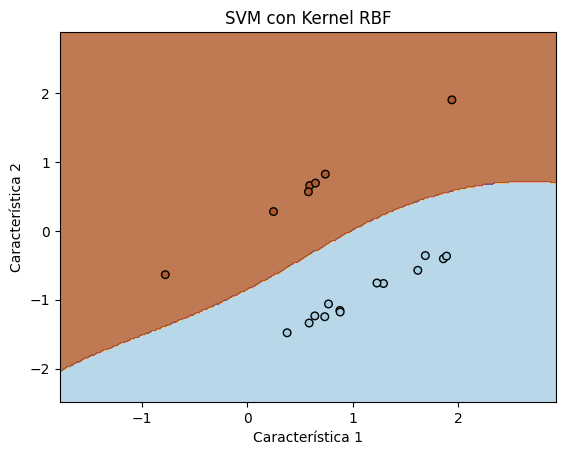

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generar datos sintéticos para clasificación
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM con kernel RBF
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale')  # gamma controla la forma de la función RBF

# Entrenar el modelo SVM
svm_classifier.fit(X_train, y_train)

# Visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño de paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
    plt.title('SVM con Kernel RBF')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

# Visualizar la frontera de decisión
plot_decision_boundary(svm_classifier, X_test, y_test)

En este ejemplo, el kernel utilizado es el kernel RBF (`'rbf'`). Puedes ajustar los parámetros como `C` y `gamma` según tus necesidades y la naturaleza de tus datos. La visualización muestra la frontera de decisión en el espacio de características transformado por el kernel RBF.

# **107. Truco del kernel en SVM, Intuición geométrica**

**Truco del Kernel en SVM: Intuición Geométrica y Ejemplo de Código**

El truco del kernel en SVM es una técnica que permite a los clasificadores SVM realizar transformaciones no lineales en el espacio de características sin tener que calcular explícitamente esas transformaciones. Esto se logra mediante el uso de funciones de kernel, que calculan el producto punto en el espacio de características transformado sin la necesidad de conocer las coordenadas exactas de los puntos en ese espacio.

**Intuición Geométrica:**

1. **Espacio de Características Original (2D):**
   - Supongamos que tenemos un conjunto de datos en un espacio bidimensional (2D) que no es linealmente separable.

2. **Transformación No Lineal con Kernel:**
   - Aplicamos una función de kernel que realiza una transformación no lineal en los datos.
   - Esta transformación proyecta los datos en un espacio de características de mayor dimensión donde se vuelven linealmente separables.

3. **Producto Punto en el Espacio Transformado:**
   - Aunque no conocemos las coordenadas exactas de los puntos en el espacio transformado, podemos calcular el producto punto entre ellos directamente en el espacio original utilizando el kernel.

**Ejemplo de Código:**

Vamos a utilizar el kernel polinómico en un conjunto de datos de ejemplo. El kernel polinómico tiene la forma $(K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d)$, donde $(c)$ es un término de sesgo y $(d)$ es el grado del polinomio.

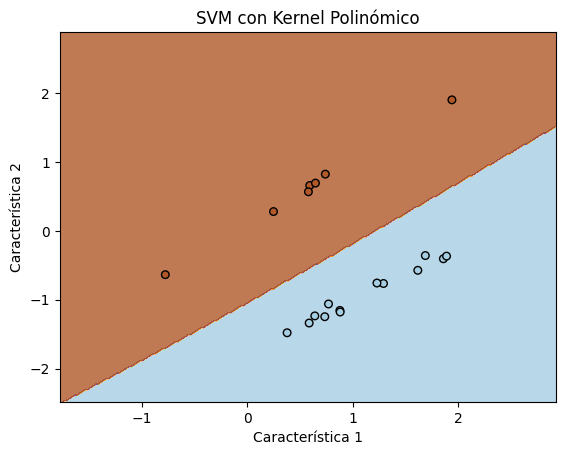

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generar datos sintéticos para clasificación
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM con kernel polinómico
svm_classifier = SVC(kernel='poly', C=1, degree=3, coef0=1)  # 'degree' es el grado del polinomio, 'coef0' es el término de sesgo

# Entrenar el modelo SVM
svm_classifier.fit(X_train, y_train)

# Visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño de paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
    plt.title('SVM con Kernel Polinómico')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

# Visualizar la frontera de decisión
plot_decision_boundary(svm_classifier, X_test, y_test)

En este ejemplo, el kernel utilizado es el kernel polinómico (`'poly'`). Puedes ajustar los parámetros como `C`, `degree`, y `coef0` según tus necesidades y la naturaleza de tus datos. La visualización muestra la frontera de decisión en el espacio de características transformado por el kernel polinómico.

# **108. Clasificador ingenuo de Bayes, La probabilidad condicional**

**Clasificador Ingenuo de Bayes y Probabilidad Condicional: Explicación y Ejemplo en Código**

El clasificador ingenuo de Bayes es un tipo de clasificador probabilístico basado en el teorema de Bayes. La probabilidad condicional es un concepto fundamental en este clasificador. Vamos a explorar ambos conceptos con detalle.

**Probabilidad Condicional:**

La probabilidad condicional de un evento $(A)$ dado que ha ocurrido otro evento $(B)$ se denota como $P(A | B)$ y se define como la probabilidad de que $(A)$ ocurra dado que sabemos que $(B)$ ha ocurrido. Matemáticamente, se expresa como:

$P(A | B) = \frac{P(A \cap B)}{P(B)}$

Donde:
- $P(A \cap B)$ es la probabilidad de que ambos $(A)$ y $(B)$ ocurran.
- $P(B)$ es la probabilidad de que $(B)$ ocurra.

**Clasificador Ingenuo de Bayes:**

Este clasificador asume independencia condicional entre cada par de características dadas las etiquetas de clase. Esto significa que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de otras características. Aunque esta suposición es "ingenua" y raramente se cumple en la práctica, el clasificador de Bayes ingenuo sigue siendo efectivo en muchos casos.

**Ejemplo de Código:**

Vamos a usar el conjunto de datos Iris y el clasificador de Bayes ingenuo de la biblioteca scikit-learn para ilustrar estos conceptos.

Precisión del clasificador ingenuo de Bayes: 1.0


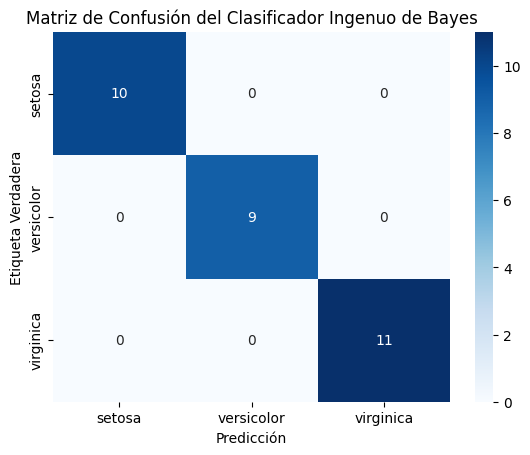

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de Bayes ingenuo
naive_bayes_classifier = GaussianNB()

# Entrenar el modelo
naive_bayes_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del clasificador ingenuo de Bayes: {accuracy}')

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión del Clasificador Ingenuo de Bayes')
plt.show()

En este ejemplo, utilizamos el clasificador ingenuo de Bayes con la implementación `GaussianNB` de scikit-learn en el conjunto de datos Iris. La precisión del modelo y la matriz de confusión se utilizan para evaluar el rendimiento del clasificador.

# **109. Clasificador ingenuo de Bayes Eventos independientes en probabilidad**

**Clasificador Ingenuo de Bayes y Eventos Independientes: Explicación y Ejemplo en Código**

El clasificador ingenuo de Bayes se basa en el teorema de Bayes y hace una suposición simplificada pero efectiva: asume independencia condicional entre cada par de características dadas las etiquetas de clase. Esto significa que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de otras características. Este concepto está vinculado al concepto más amplio de eventos independientes en probabilidad.

**Eventos Independientes en Probabilidad:**

Dos eventos $(A)$ y $(B)$ son independientes si la ocurrencia (o no ocurrencia) de uno no afecta la probabilidad de que ocurra el otro. Matemáticamente, dos eventos son independientes si $P(A \cap B) = P(A) \cdot P(B)$, donde $P(A \cap B)$ es la probabilidad de que ambos $(A)$ y $(B)$ ocurran.

**Ejemplo de Código:**

Vamos a ilustrar la idea de eventos independientes usando un ejemplo simple con monedas. Supongamos que lanzamos dos monedas al mismo tiempo

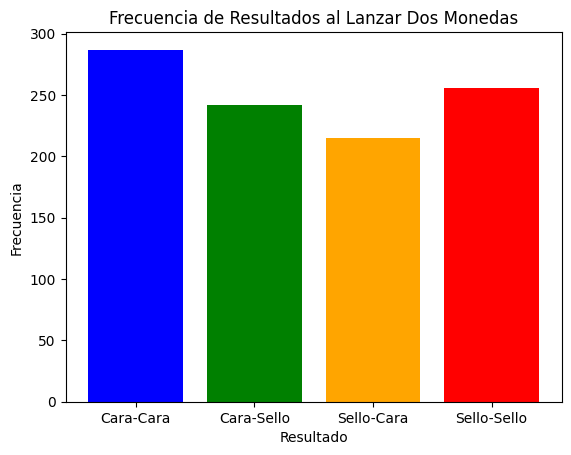

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para lanzar dos monedas
def lanzar_dos_monedas():
    eventos = ['Cara', 'Sello']
    resultado_moneda1 = np.random.choice(eventos)
    resultado_moneda2 = np.random.choice(eventos)
    return resultado_moneda1, resultado_moneda2

# Realizar múltiples lanzamientos de dos monedas
num_lanzamientos = 1000
resultados = [lanzar_dos_monedas() for _ in range(num_lanzamientos)]

# Contar la ocurrencia de eventos individuales
cara_cara_count = sum(1 for resultado in resultados if resultado == ('Cara', 'Cara'))
cara_sello_count = sum(1 for resultado in resultados if resultado == ('Cara', 'Sello'))
sello_cara_count = sum(1 for resultado in resultados if resultado == ('Sello', 'Cara'))
sello_sello_count = sum(1 for resultado in resultados if resultado == ('Sello', 'Sello'))

# Visualizar la frecuencia de los eventos
eventos = ['Cara-Cara', 'Cara-Sello', 'Sello-Cara', 'Sello-Sello']
frecuencias = [cara_cara_count, cara_sello_count, sello_cara_count, sello_sello_count]

plt.bar(eventos, frecuencias, color=['blue', 'green', 'orange', 'red'])
plt.title('Frecuencia de Resultados al Lanzar Dos Monedas')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

En este ejemplo, la frecuencia de eventos individuales se visualiza después de lanzar dos monedas repetidamente. La independencia entre los eventos "Cara" y "Sello" es evidente, ya que la probabilidad de obtener "Cara" en la segunda moneda no está influenciada por el resultado de la primera moneda. Este concepto de independencia es fundamental para la suposición del clasificador ingenuo de Bayes y su capacidad para manejar múltiples características en problemas de clasificación.

# **110. Clasificador ingenuo de Bayes Eventos mutuamente excluyentes**

**Clasificador Ingenuo de Bayes y Eventos Mutuamente Excluyentes: Explicación y Ejemplo en Código**

Los eventos mutuamente excluyentes son eventos que no pueden ocurrir al mismo tiempo. En el contexto del clasificador ingenuo de Bayes, la asunción de independencia condicional entre características dadas las etiquetas de clase implica que estas características son mutuamente excluyentes.

**Eventos Mutuamente Excluyentes:**

Dos eventos son mutuamente excluyentes si la ocurrencia de uno excluye la ocurrencia del otro. Matemáticamente, la probabilidad de la unión de dos eventos mutuamente excluyentes $(A)$ y $(B)$ se puede calcular como $P(A \cup B) = P(A) + P(B)$, ya que la intersección $(A \cap B)$ es vacía.

**Ejemplo de Código:**

Vamos a ilustrar la idea de eventos mutuamente excluyentes usando un ejemplo simple con lanzamiento de dados. Supongamos que lanzamos un dado y queremos calcular la probabilidad de obtener un número par o un número impar.

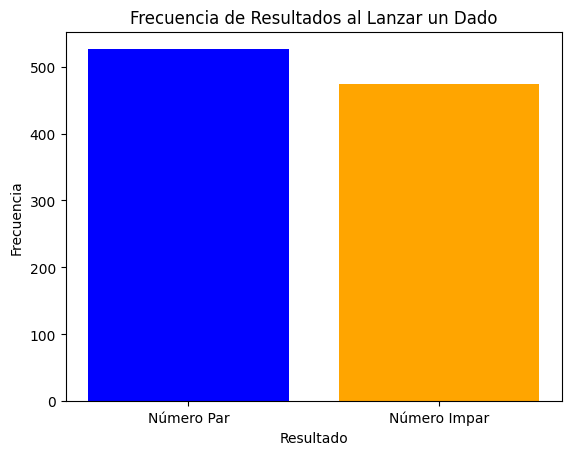

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para lanzar un dado
def lanzar_dado():
    return np.random.choice([1, 2, 3, 4, 5, 6])

# Realizar múltiples lanzamientos de dado
num_lanzamientos = 1000
resultados = [lanzar_dado() for _ in range(num_lanzamientos)]

# Contar la ocurrencia de eventos individuales
num_pares = sum(1 for resultado in resultados if resultado % 2 == 0)
num_impares = sum(1 for resultado in resultados if resultado % 2 != 0)

# Visualizar la frecuencia de los eventos
eventos = ['Número Par', 'Número Impar']
frecuencias = [num_pares, num_impares]

plt.bar(eventos, frecuencias, color=['blue', 'orange'])
plt.title('Frecuencia de Resultados al Lanzar un Dado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

En este ejemplo, la frecuencia de eventos individuales se visualiza después de lanzar un dado repetidamente. Los eventos "Número Par" y "Número Impar" son mutuamente excluyentes, ya que no se pueden obtener al mismo tiempo en un solo lanzamiento. La probabilidad de la unión de estos eventos es simplemente la suma de sus probabilidades individuales. Este concepto de mutua exclusión es relevante en el contexto del clasificador ingenuo de Bayes, donde las características se consideran independientes condicionalmente dadas las etiquetas de clase.

| **Inicio** | **atrás 10** | **Siguiente 12** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./10_Machine_Learning.ipynb)| [⏩](./12_Machine_Learning.ipynb)